<a href="https://colab.research.google.com/github/kunalgupta016/Handwritten_Digits_Prediction/blob/main/HandwrittenDigit.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf

In [ ]:
(X_train,y_train),(X_test,y_test) = tf.keras.datasets.mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
import matplotlib.pyplot as plt

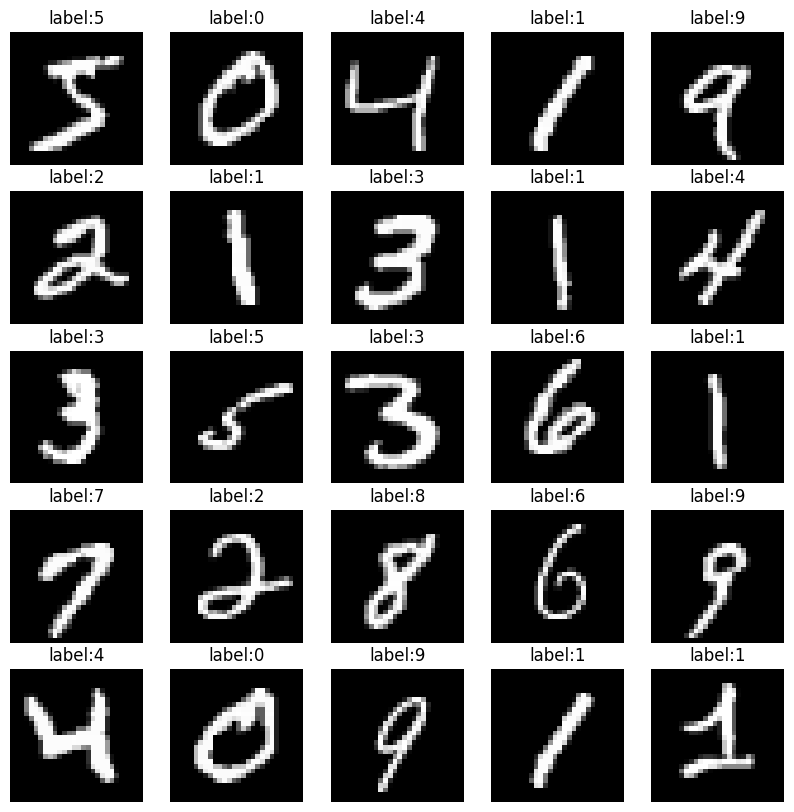

In [ ]:
plt.figure(figsize=(10,10))
for i in range(25):
  plt.subplot(5,5,i+1)
  plt.imshow(X_train[i],cmap='gray')
  plt.axis('off')
  plt.title(f'label:{y_train[i]}')
plt.show()


In [ ]:
X_train = X_train / 255.0
X_test = X_test / 255.0

In [ ]:
X_train = X_train.reshape((X_train.shape[0], -1))
X_test = X_test.reshape((X_test.shape[0], -1))

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
model = LogisticRegression()
model.fit(X_train, y_train)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [ ]:
import sklearn.metrics

In [ ]:
accuracy = model.score(X_test, y_test)
print(f"Test Accuracy: {accuracy:.4f}")

Test Accuracy: 0.9257


In [ ]:
predictions = model.predict(X_test)

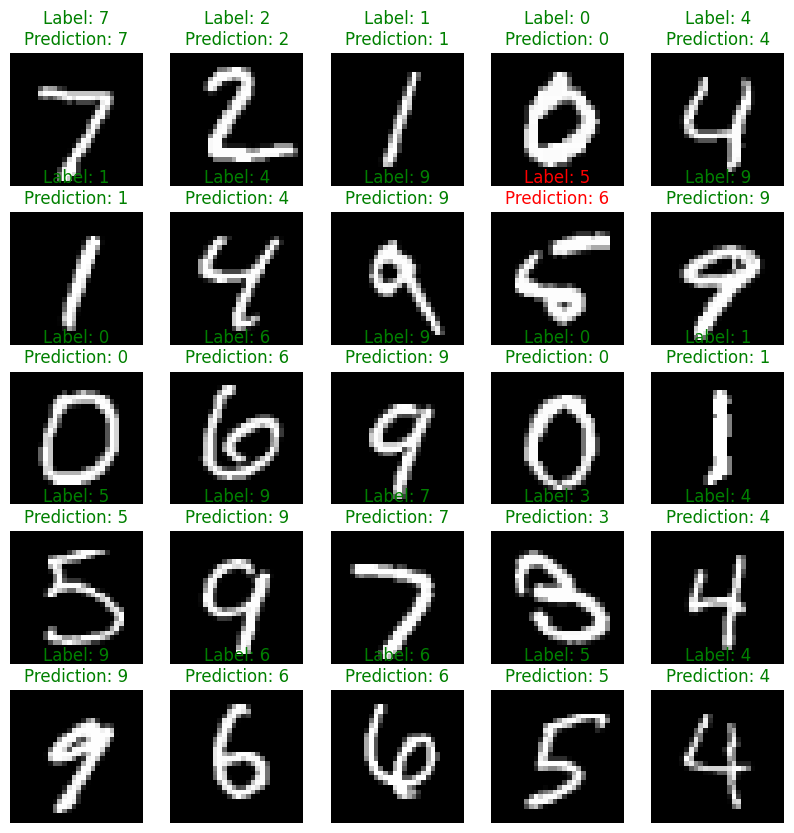

In [ ]:
import numpy as np
# Display sample predictions
plt.figure(figsize=(10, 10))
for i in range(25):
  plt.subplot(5, 5, i + 1)
  plt.imshow(X_test[i].reshape(28, 28), cmap='gray')
  plt.axis('off')
  plt.title(f'Label: {y_test[i]}\nPrediction: {predictions[i]}', color='green' if y_test[i] == predictions[i] else 'red')
plt.show()

In [ ]:
accuracy = sklearn.metrics.accuracy_score(y_test, predictions)
print(f"Test Accuracy: {accuracy:.4f}")

Test Accuracy: 0.9257


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 51s 29ms/step - accuracy: 0.9052 - loss: 0.3023 - val_accuracy: 0.9885 - val_loss: 0.0443
Epoch 2/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 83s 29ms/step - accuracy: 0.9860 - loss: 0.0454 - val_accuracy: 0.9890 - val_loss: 0.0387
Epoch 3/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 49s 29ms/step - accuracy: 0.9912 - loss: 0.0285 - val_accuracy: 0.9897 - val_loss: 0.0313
Epoch 4/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 47s 28ms/step - accuracy: 0.9931 - loss: 0.0223 - val_accuracy: 0.9912 - val_loss: 0.0325
Epoch 5/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 83s 28ms/step - accuracy: 0.9951 - loss: 0.0144 - val_accuracy: 0.9902 - val_loss: 0.0362
Epoch 6/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 49s 29ms/step - accuracy: 0.9960 - loss: 0.0123 - val_accuracy: 0.9902 - val_loss: 0.0395
Epoch 7/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 81s 28ms/step - accuracy: 0.9971 - loss: 0.0094 - val_accuracy: 0.9907 - val_loss: 0.0335
Epoch 8/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 83s 29ms/step - accuracy: 0.9980 -

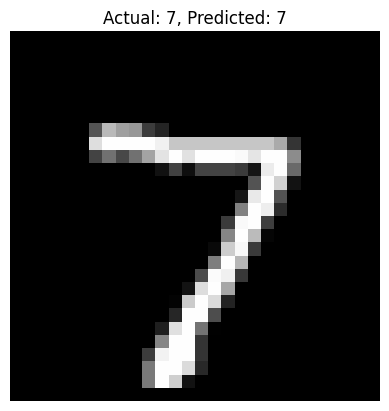

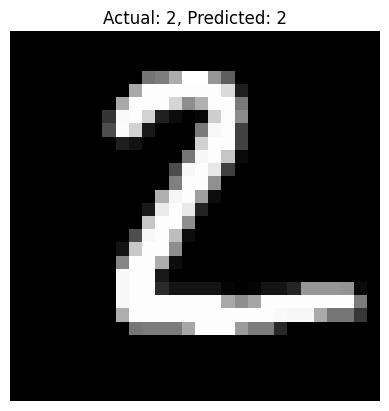

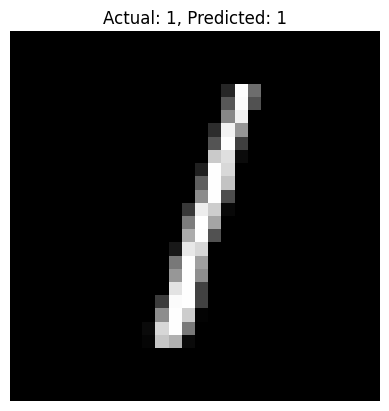

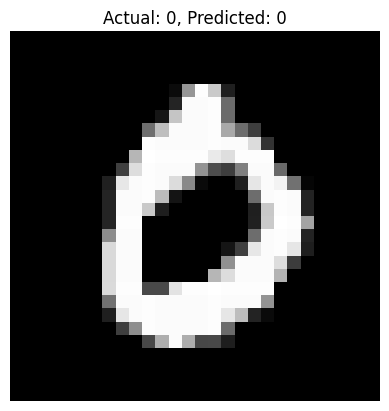

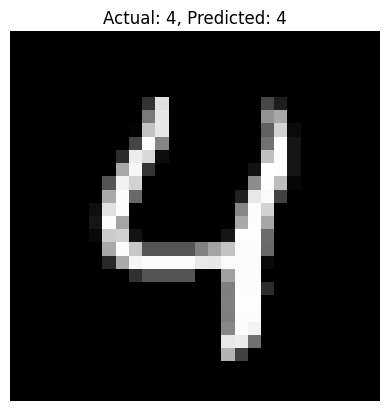

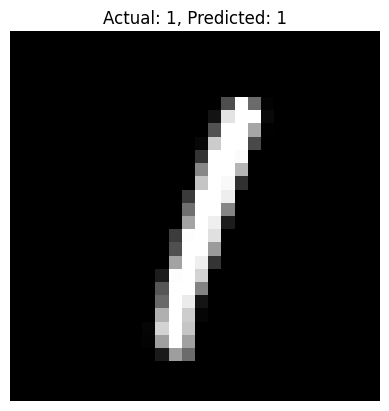

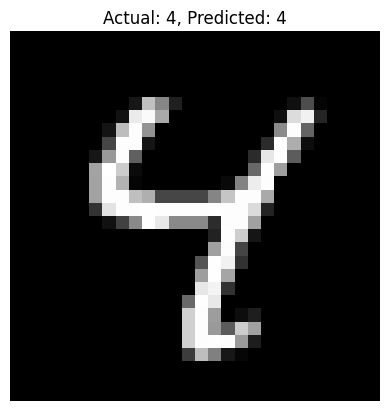

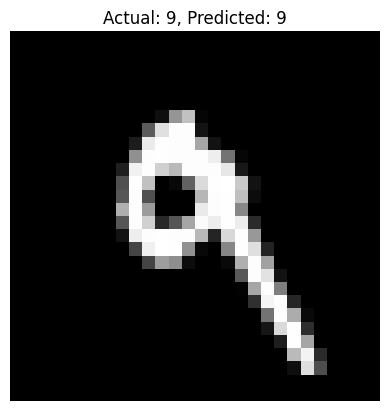

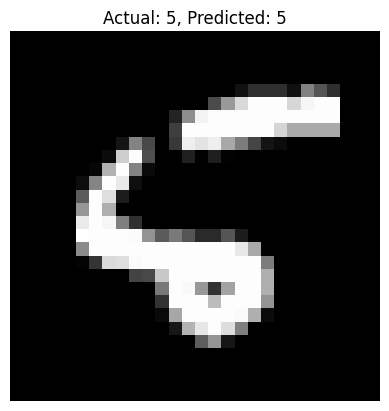

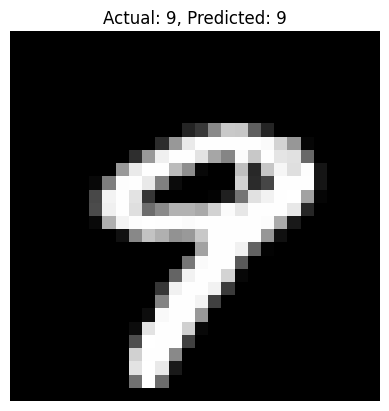

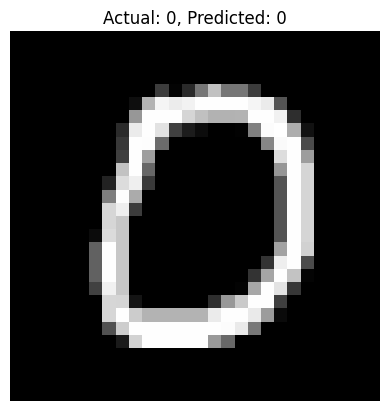

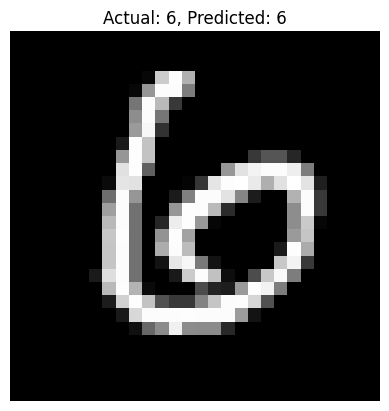

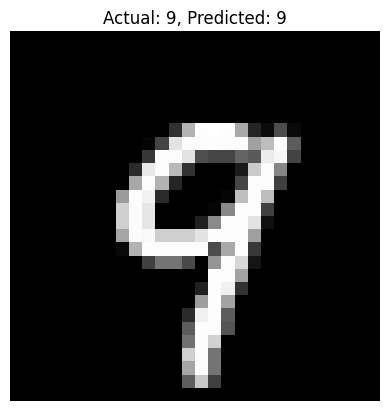

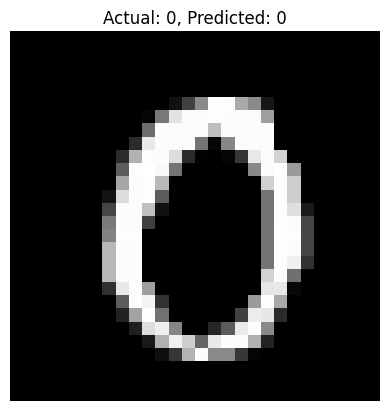

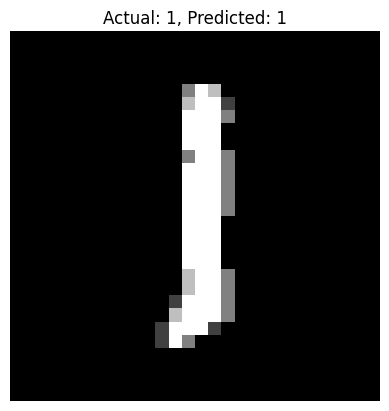

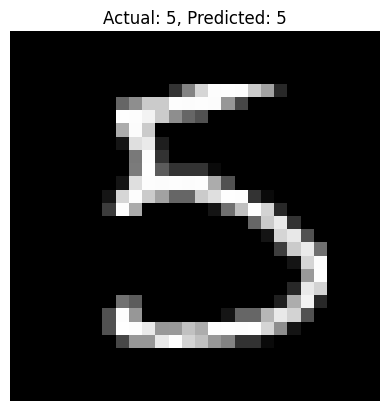

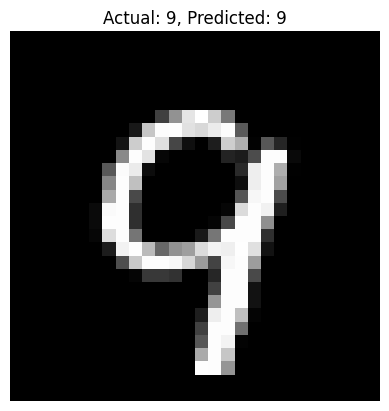

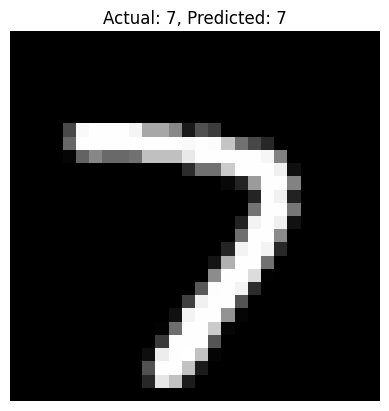

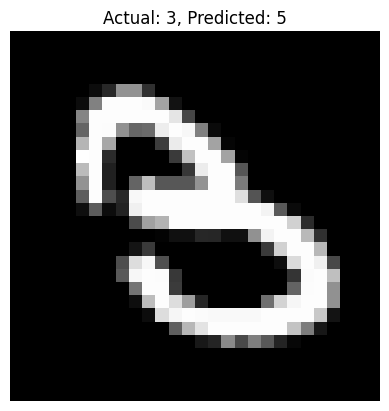

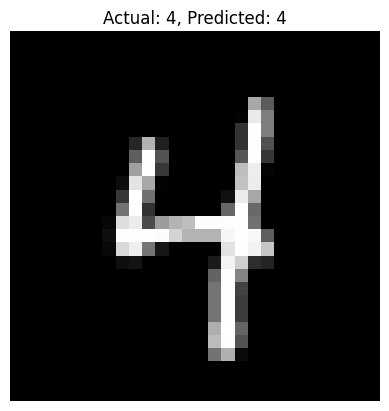

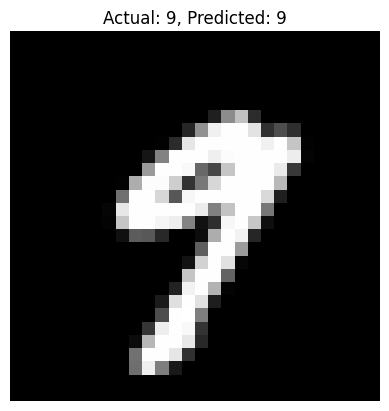

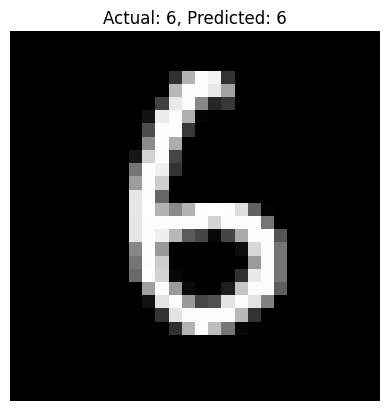

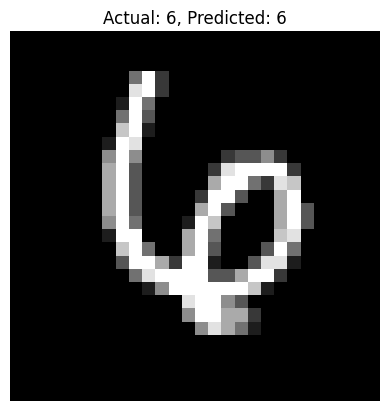

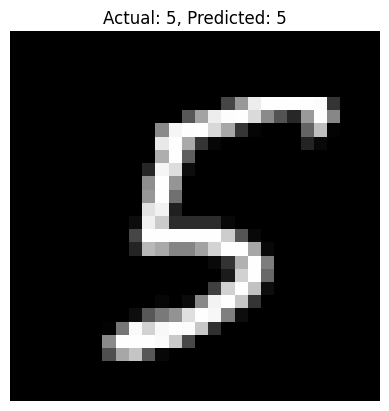

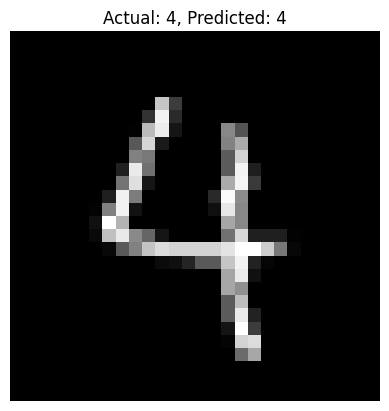

In [4]:

import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.callbacks import EarlyStopping

(x_train, y_train), (x_test, y_test) = mnist.load_data()

x_train = x_train.reshape(-1, 28, 28, 1).astype('float32') / 255.0
x_test = x_test.reshape(-1, 28, 28, 1).astype('float32') / 255.0


model = Sequential([
    Conv2D(32, kernel_size=(3,3), activation='relu', input_shape=(28,28,1)),
    MaxPooling2D(pool_size=(2,2)),

    Conv2D(64, kernel_size=(3,3), activation='relu'),
    MaxPooling2D(pool_size=(2,2)),

    Flatten(),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')  # 10 output classes (0 to 9)
])


early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])


history = model.fit(x_train, y_train, epochs=10, validation_split=0.1 , callbacks=[early_stopping])


test_loss, test_accuracy = model.evaluate(x_test, y_test)
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")


predictions = model.predict(x_test)
predicted_labels = np.argmax(predictions, axis=1)


for i in range(25):
    plt.imshow(x_test[i].reshape(28, 28), cmap='gray')
    plt.title(f"Actual: {y_test[i]}, Predicted: {predicted_labels[i]}")
    plt.axis('off')
    plt.show()


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
Predicted Digit: 6


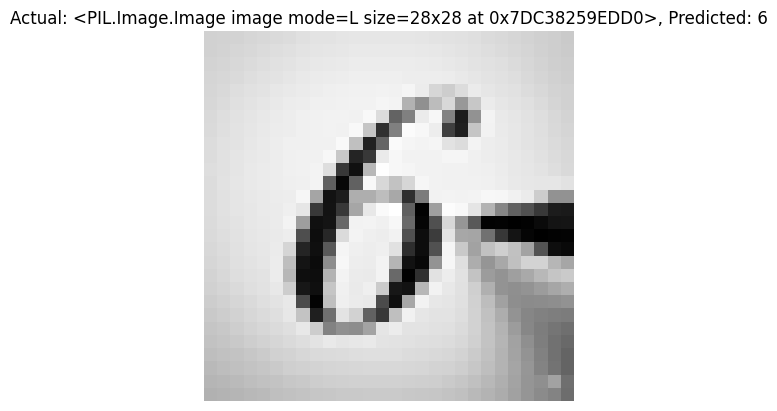

In [11]:
from PIL import Image
import numpy as np

# Load and preprocess the image
img = Image.open("sample_digit_6.png").convert('L')
img = img.resize((28, 28))  # Resize if needed
img_array = np.array(img).astype("float32") / 255.0
img_array = 1 - img_array
img_array = img_array.reshape(1, 28, 28, 1)

# Predict using my trained model
prediction = model.predict(img_array)
predicted_label = np.argmax(prediction)

print("Predicted Digit:", predicted_label)

plt.imshow(img, cmap='gray')
plt.title(f"Actual: {img}, Predicted: {predicted_label}")
plt.axis('off')
plt.show()
